# __Incremental Capstone - Week 9__

__Task:  Build an Artificial Neural Network to identify the customers who will be
leaving the bank, based on the data of all customers over the past three months.
Use the Banking dataset to perform the following tasks.__

__Task A:__
1. Load the dataset (Churn_Modelling.csv, the name of the file when
downloaded from Kaggle.) <br>
https://www.kaggle.com/datasets/shrutimechlearn/churn-modelling
2. Drop the customers' personal data columns that will not be useful for
analysis. (Hint: First three columns)
3. Prepare independent variables X and dependent variable Y (Exited).
4. LabelEncode the Gender column
5. OneHotEncode the Geography column
6. Perform a train test split in the ratio 80:20 and random_state 0
7. Perform Feature scaling on X_train and X_text using StandardScalar
8. Build a Keras Sequential model with the following layers
- Dense layer with 6 neurons and activation relu
- Dense layer with 6 neurons and activation relu
- Dense layer with 1 neuron and activation sigmoid
- Compile the model with adam optimizer, binary_crossentropy loss and
metric accuracy
- Train the model for 10 epochs and batch size 10
9. Evaluate the model on the test set; print the accuracy and confusion matrix

__Task B:__
Use the built ANN model to predict if the customer with the following
information will leave the bank:
- Geography: France
- Credit Score: 600
- Gender: Male
- Age: 40 years old
- Tenure: 3 years
- Balance: \$60000
- Number of Products: 2
- Does this customer have a credit card? Yes
- Is this customer an Active Member: Yes
- Estimated Salary: $ 50000

So, should we let the customer go?


##Task A

__1. Load the dataset (Churn_Modelling.csv, the name of the file when
downloaded from Kaggle.)__

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Read Data From and Reprocessing it
dataset = pd.read_csv('./data/churn_modeling.csv')

In [3]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


__2. Drop the customers' personal data columns that will not be useful for analysis. (Hint: First three columns)__

In [4]:
dataset.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


__3. Prepare independent variables X and dependent variable Y (Exited).__

In [5]:
X=dataset.iloc[:,:-1].values
Y=dataset.iloc[:,-1].values

In [6]:
X[:10]

array([[619, 'France', 'Female', 42, 2, 0.0, 1, 1, 1, 101348.88],
       [608, 'Spain', 'Female', 41, 1, 83807.86, 1, 0, 1, 112542.58],
       [502, 'France', 'Female', 42, 8, 159660.8, 3, 1, 0, 113931.57],
       [699, 'France', 'Female', 39, 1, 0.0, 2, 0, 0, 93826.63],
       [850, 'Spain', 'Female', 43, 2, 125510.82, 1, 1, 1, 79084.1],
       [645, 'Spain', 'Male', 44, 8, 113755.78, 2, 1, 0, 149756.71],
       [822, 'France', 'Male', 50, 7, 0.0, 2, 1, 1, 10062.8],
       [376, 'Germany', 'Female', 29, 4, 115046.74, 4, 1, 0, 119346.88],
       [501, 'France', 'Male', 44, 4, 142051.07, 2, 0, 1, 74940.5],
       [684, 'France', 'Male', 27, 2, 134603.88, 1, 1, 1, 71725.73]],
      dtype=object)

In [7]:
Y[:10]

array([1, 0, 1, 0, 0, 1, 0, 1, 0, 0])

__4. LabelEncode the Gender column__

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
print(X[:10,2])
X[:,2] = le.fit_transform(X[:,2])
print(X[:10,2])

['Female' 'Female' 'Female' 'Female' 'Female' 'Male' 'Male' 'Female'
 'Male' 'Male']
[0 0 0 0 0 1 1 0 1 1]


__5. OneHotEncode the Geography column__

In [9]:
oh = pd.get_dummies(X[:,1]).astype('int')

In [10]:
oh

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1
...,...,...,...
9995,1,0,0
9996,1,0,0
9997,1,0,0
9998,0,1,0


In [11]:
oh.values

array([[1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       ...,
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0]])

In [12]:
X = np.delete(X, 1, 1)  # delete second column of X, coluimn 1, axis=1
X[:10]

array([[619, 0, 42, 2, 0.0, 1, 1, 1, 101348.88],
       [608, 0, 41, 1, 83807.86, 1, 0, 1, 112542.58],
       [502, 0, 42, 8, 159660.8, 3, 1, 0, 113931.57],
       [699, 0, 39, 1, 0.0, 2, 0, 0, 93826.63],
       [850, 0, 43, 2, 125510.82, 1, 1, 1, 79084.1],
       [645, 1, 44, 8, 113755.78, 2, 1, 0, 149756.71],
       [822, 1, 50, 7, 0.0, 2, 1, 1, 10062.8],
       [376, 0, 29, 4, 115046.74, 4, 1, 0, 119346.88],
       [501, 1, 44, 4, 142051.07, 2, 0, 1, 74940.5],
       [684, 1, 27, 2, 134603.88, 1, 1, 1, 71725.73]], dtype=object)

In [13]:
X = np.concatenate((X,oh.values),axis=1)
X[:10]

array([[619, 0, 42, 2, 0.0, 1, 1, 1, 101348.88, 1, 0, 0],
       [608, 0, 41, 1, 83807.86, 1, 0, 1, 112542.58, 0, 0, 1],
       [502, 0, 42, 8, 159660.8, 3, 1, 0, 113931.57, 1, 0, 0],
       [699, 0, 39, 1, 0.0, 2, 0, 0, 93826.63, 1, 0, 0],
       [850, 0, 43, 2, 125510.82, 1, 1, 1, 79084.1, 0, 0, 1],
       [645, 1, 44, 8, 113755.78, 2, 1, 0, 149756.71, 0, 0, 1],
       [822, 1, 50, 7, 0.0, 2, 1, 1, 10062.8, 1, 0, 0],
       [376, 0, 29, 4, 115046.74, 4, 1, 0, 119346.88, 0, 1, 0],
       [501, 1, 44, 4, 142051.07, 2, 0, 1, 74940.5, 1, 0, 0],
       [684, 1, 27, 2, 134603.88, 1, 1, 1, 71725.73, 1, 0, 0]],
      dtype=object)

__6. Perform a train test split in the ratio 80:20 and random_state 0__

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

__7. Perform Feature scaling on X_train and X_text using StandardScalar__

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

__8. Build a Keras Sequential model with the following layers__
- Dense layer with 6 neurons and activation relu
- Dense layer with 6 neurons and activation relu
- Dense layer with 1 neuron and activation sigmoid
- Compile the model with adam optimizer, binary_crossentropy loss and
metric accuracy
- Train the model for 10 epochs and batch size 10.

In [16]:
import tensorflow as tf

In [17]:
X_train.shape

(8000, 12)

In [18]:
ann = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(12,)),
    tf.keras.layers.Dense(units=6,activation='relu'),
    tf.keras.layers.Dense(units=6,activation='relu'),
    tf.keras.layers.Dense(units=1,activation='sigmoid')
])

In [19]:
ann.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 6)              │            78 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 127 (508.00 B)

 Trainable params: 127 (508.00 B)

 Non-trainable params: 0 (0.00 B)

In [20]:
# Compile
ann.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

In [21]:
# Train
history = ann.fit(X_train,y_train,validation_split=0.2,batch_size = 32,epochs = 1_000, verbose=0)

In [22]:
import matplotlib.pyplot as plt
def plotModelHistory (h):
  fig, ax = plt.subplots(1 , 2, figsize =(15 , 4))
  ax[0].plot(h.history['loss'])
  ax[0].plot (h.history['val_loss'])
  ax[0].legend(['loss','val_loss'])
  ax[0].title.set_text("Train loss vs Validation loss")
  ax[1].plot(h.history['accuracy' ])
  ax[1].plot(h.history['val_accuracy'])
  ax[1].legend(['accuracy','val_accuracy'])
  ax[1].title.set_text("Train accuracy vs Validation accuracy")
  print("Max.Training Accuracy",max(h. history['accuracy']))
  print("Max.Validaiton Accuracy",max(h.history['val_accuracy']))

Max.Training Accuracy 0.8675000071525574
Max.Validaiton Accuracy 0.8656250238418579


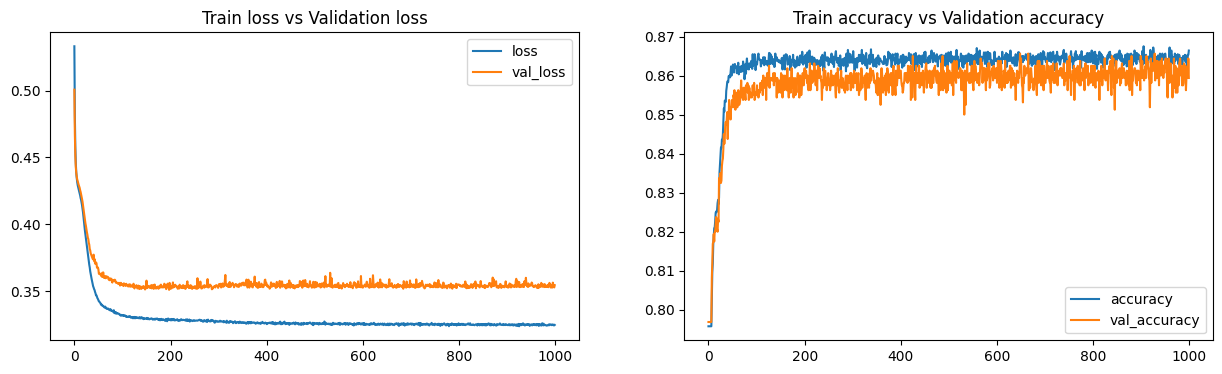

In [23]:
plotModelHistory(history)

##Observation
- Training Loss and Validation Loss decreases smoothly
- Training accuracy and Validation accuracy shows a continuous increase
- The model does not show signs of overfitting

In [26]:
ann128 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(12,)),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])
ann128.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
history2 = ann128.fit(X_train, y_train,validation_split=0.2,batch_size = 32,epochs = 1_000, verbose=0)

Max.Training Accuracy 0.9557812213897705
Max.Validaiton Accuracy 0.8675000071525574


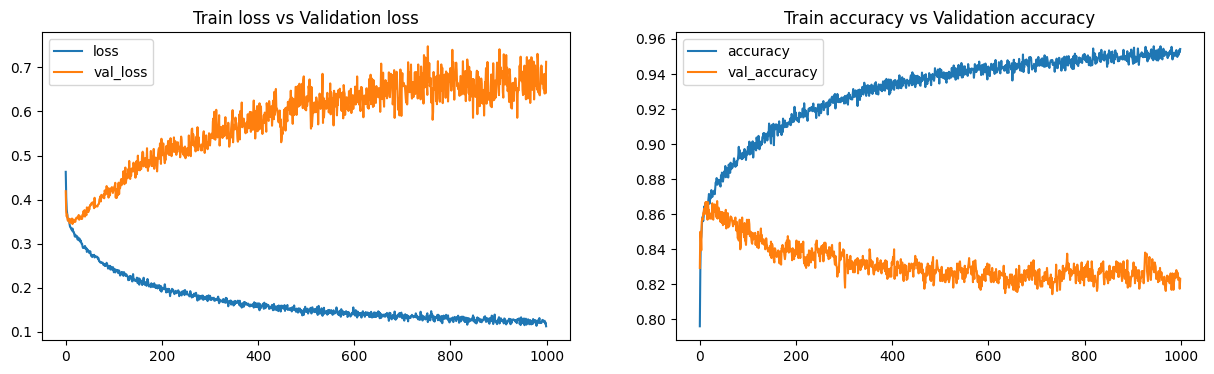

In [27]:
plotModelHistory(history2)

__9. Evaluate the model on the test set; print the accuracy and confusion matrix.__

In [2]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.50)
print(np.concatenate((y_pred.reshape(len (y_pred), 1), y_test.reshape(len (y_test), 1)), 1))

In [2]:
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test,y_pred)
print("Accuracy score:",accuracy)

In [3]:
# Confusion Matrix
cm = metrics.confusion_matrix(y_test,y_pred)
print(cm)

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap="Blues");  #annot=True to annotate cells, ftm='g' to disable scientific notation
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix for the Naive Bayes model');
ax.xaxis.set_ticklabels(['YES', 'NO']); ax.yaxis.set_ticklabels(['YES', 'NO']);

In [3]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

## Observation
- Both Classification report and confusion report says that Model is able to
accurately predict people who doesn't churn.
- The model needs slight improvement in predicting people who might churn
- Training the model with more epochs and other hyper parameter tuning
will help to achieve this
- Model gives an accuracy of 85% on test set
- Recall shows how many of the clients who actually leave were detected by
the model and precision shows how many of the clients identified by the
model actually left.
- The Recall values tries to reduce the False Negatives which is okay to have
less value in this churn use case

__Task B:__
Use the built ANN model to predict if the customer with the following
information will leave the bank:
- Geography: France
- Credit Score: 600
- Gender: Male
- Age: 40 years old
- Tenure: 3 years
- Balance: \$60000
- Number of Products: 2
- Does this customer have a credit card? Yes
- Is this customer an Active Member: Yes
- Estimated Salary: \$50000

So, should we let the customer go?

In [4]:
# CODE HERE

## __Therefore, our ANN model predicts that this customer will stay in the bank.__

__Important note 1:__
Notice that the values of the features were all input in a
double pair of square brackets. That's because the "predict" method always
expects a 2D array as the format of its inputs. And putting our values into a
double pair of square brackets makes the input exactly a 2D array.

__Important note 2:__ Notice also that the "France" country was not input as a string
in the last column but as "1, 0, 0" in the first three columns. That's because of
course the predict method expects the one-hot-encoded values of the state, and
as we see in the first row of the matrix of features X, "France" was encoded as "1,
0, 0". And be careful to include these values in the first three columns, because
the dummy variables are always created in the first columns.